In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

### Importing data and preprocessing

In [2]:
pop_data = pd.read_csv('/media/shreyashkharat/Storage Drive/Machine Learning/Python/Projects/MIC Prediction Model/insurance.csv', header = 0)
pop_data_fixed = pd.read_csv('/media/shreyashkharat/Storage Drive/Machine Learning/Python/Projects/MIC Prediction Model/insurance.csv', header = 0)
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [3]:
pop_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


* The means and medians of non-categorical independent variables are quite close, so we expect that there are no outliers.
* The distribution of the quantile value seem ordinary, hence there is no skewness in data.

In [4]:
# Dummy Variable creation
pop_data = pd.get_dummies(pop_data)
pop_data.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [5]:
del pop_data['smoker_no']
del pop_data['region_southwest']
del pop_data['sex_female']

### Graphical Analysis of Data

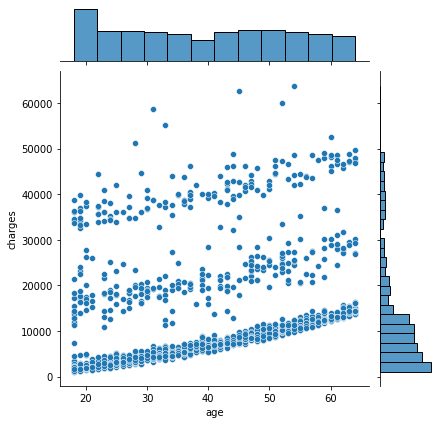

In [6]:
sns.jointplot(x = 'age', y = 'charges', data = pop_data)

* Clearly, the above plot suggests that the variable charges increases with age.
* But the relation between age and charges isn't linear or for that matter the relation has some other aspects.

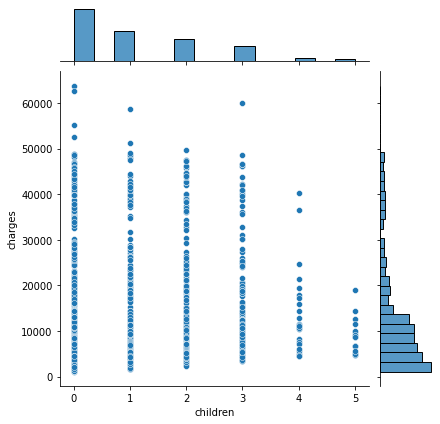

In [7]:
sns.jointplot(x = 'children', y = 'charges', data = pop_data)

### Variable sepration, Train Test Split and Correlation Matrix

In [8]:
x = pop_data.loc[:, pop_data.columns != 'charges']
y = pop_data['charges']

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [10]:
pop_data.corr()

,age,bmi,children,charges,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,0.002475,-0.000407,-0.011642
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.138156,-0.135996,0.270025
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,-0.022808,0.024806,-0.023066
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,0.006349,-0.039905,0.073982
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.002425,-0.011156,0.017117
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,0.002811,-0.036945,0.068498
region_northeast,0.002475,-0.138156,-0.022808,0.006349,-0.002425,0.002811,1.000000,-0.320177,-0.345561
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,-0.320177,1.000000,-0.346265
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.345561,-0.346265,1.000000


* There is no multi-colineraity in the above data.

## Linear Regression Model

In [11]:
from sklearn.linear_model import LinearRegression
model_linear = LinearRegression()
model_linear.fit(x_train, y_train)

LinearRegression()

In [12]:
print(model_linear.intercept_, model_linear.coef_)

-12590.022243963997 [ 2.53700500e+02  3.35962814e+02  4.36910121e+02 -1.54637279e+01
  2.36050173e+04  7.61948706e+02  5.01815974e+02 -1.51330127e+02]


In [13]:
lm_predict = model_linear.predict(x_test)

In [14]:
from sklearn.metrics import r2_score
rsq_lm = r2_score(y_test, lm_predict)
rsq_lm

0.7999876970680434

* The Linear Regression Model has an R-squared value of 0.7999 on above test_set, so the model is modefrately accurate.

## Regression Tree

In [15]:
from sklearn import tree
reg_tree = tree.DecisionTreeRegressor(max_depth = 5)
reg_tree.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=5)

### Predictions and R-square calculation

In [16]:
reg_predict_train = reg_tree.predict(x_train)
reg_predict_test = reg_tree.predict(x_test)

In [17]:
from sklearn.metrics import r2_score
rsq_reg_train = r2_score(y_train, reg_predict_train)
rsq_reg_test = r2_score(y_test, reg_predict_test)
rsq_reg_train, rsq_reg_test

(0.8731782445850186, 0.8426354825033413)

* The Simple Regression Tree has an R-squared value of 0.8426 on above test_set, so the model is highly accurate.

### Ploting the Tree

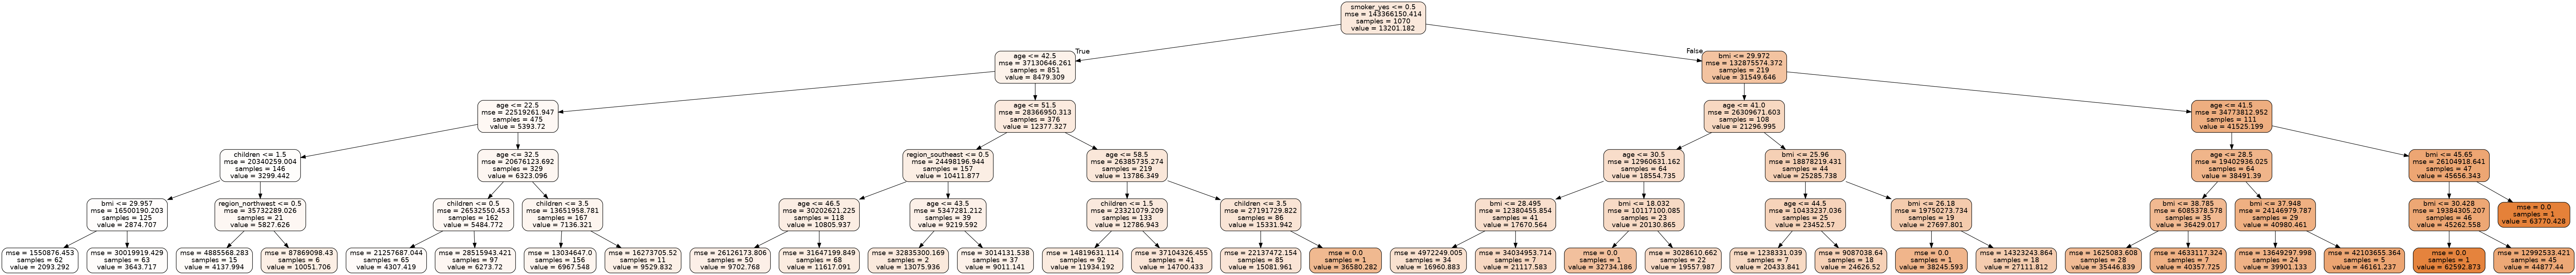

In [18]:
import graphviz
dot_data_reg = tree.export_graphviz(reg_tree, out_file = None, feature_names = x_train.columns, rounded = True, filled = True)
from IPython.display import Image
import pydotplus
graph_reg = pydotplus.graph_from_dot_data(dot_data_reg)
Image(graph_reg.create_png())

### Exporting Graph to jpg file

In [19]:
dd_reg_export = tree.export_graphviz(reg_tree, out_file = 'graph_reg.dot', feature_names = x_train.columns, rounded = True, filled = True)
# Converting into jpg
from subprocess import call
call(['dot', '-Tjpg', 'graph_reg.dot', '-o', 'graph_reg.jpg', '-Gdpi=600'])

0

### Trees with other Growth Control Parameter

In [20]:
reg_tree1 = tree.DecisionTreeRegressor(min_samples_split = 50)
reg_tree1.fit(x_train, y_train)

DecisionTreeRegressor(min_samples_split=50)

In [21]:
# R-square calculation.
reg1_predict_test = reg_tree1.predict(x_test)
rsq_reg1_test = r2_score(y_test, reg1_predict_test)
reg1_predict_train = reg_tree1.predict(x_train)
rsq_reg1_train = r2_score(y_train, reg1_predict_train)
rsq_reg1_train, rsq_reg1_test

(0.8736024038575126, 0.873844804783944)

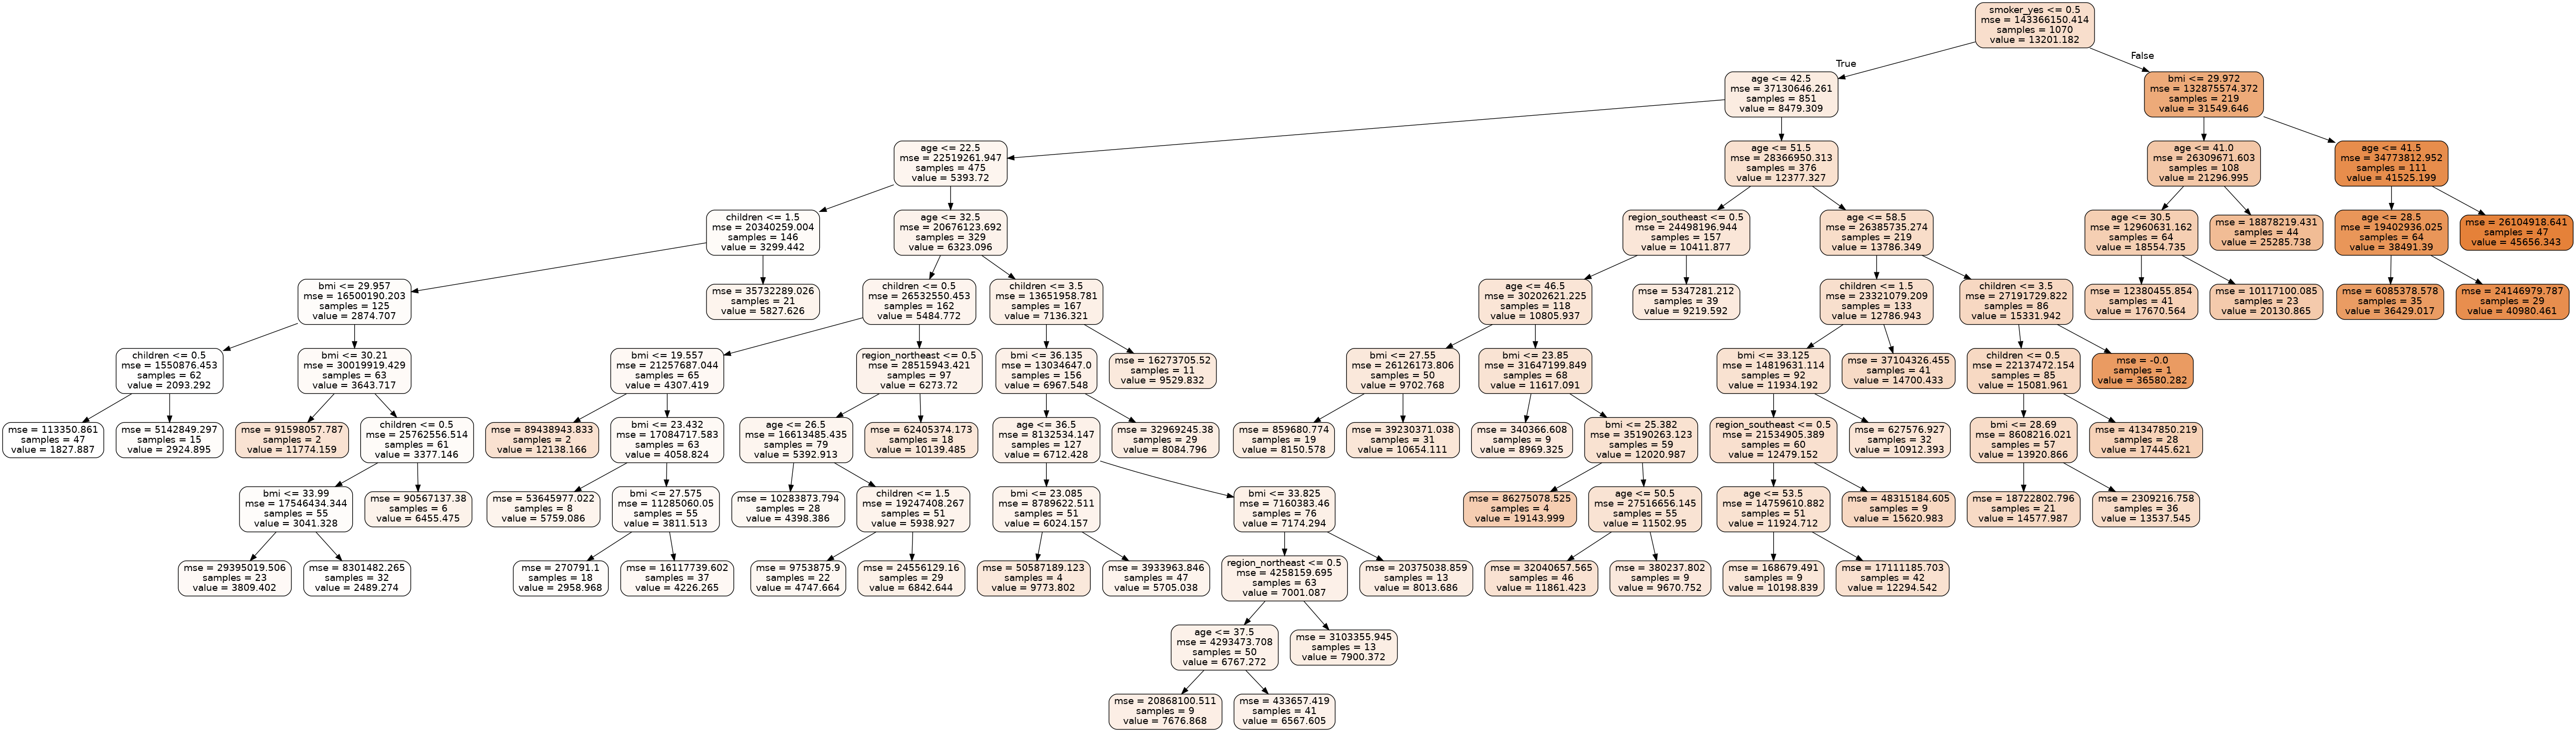

In [22]:
# Plot of the tree
dot_data_reg1 = tree.export_graphviz(reg_tree1, out_file = None, feature_names = x_train.columns, rounded = True, filled = True)
graph_reg1 = pydotplus.graph_from_dot_data(dot_data_reg1)
Image(graph_reg1.create_png())

In [23]:
# Exporting Graph to jpg format
dd_reg1_export = tree.export_graphviz(reg_tree1, out_file = 'graph_reg1.dot', feature_names = x_train.columns, rounded = True, filled = True)
# Converting into jpg
from subprocess import call
call(['dot', '-Tjpg', 'graph_reg1.dot', '-o', 'graph_reg1.jpg', '-Gdpi=600'])

0

The Model has got quite accurate with R-squared value 0.8738 on test_set.
Let's just apply Random Forest Ensemble technique and see the results.

## Random Forest

In [24]:
from sklearn.ensemble import RandomForestRegressor
random_tree = RandomForestRegressor(n_estimators = 5000, n_jobs = -1, random_state = 0, max_features = 4)
random_tree.fit(x_train, y_train)

RandomForestRegressor(max_features=4, n_estimators=5000, n_jobs=-1,
                      random_state=0)

In [25]:
# R-squared calculation
random_predict_train = random_tree.predict(x_train)
random_predict_test = random_tree.predict(x_test)
rsq_random_train = r2_score(y_train, random_predict_train)
rsq_random_test = r2_score(y_test, random_predict_test)
rsq_random_train, rsq_random_test

(0.9765793712852932, 0.8980520280367874)

After applying Random Forest we get the R-squared value as 0.8980 on test_set, implies the model is pretty good.